In [1]:
import numpy as np
import numpy.linalg as lyn
import random
import urllib.request as urlreq
import re
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Get the Bills Voted On
url = 'https://www.senate.gov/legislative/LIS/roll_call_lists/vote_menu_110_1.htm'
req = urlreq.Request(url)
resp = urlreq.urlopen(req)
respData = resp.read()
leader='https://www.senate.gov/l'
listoflinks=[]
data = re.findall(r'<tr(.*?)/tr>',str(respData))
c=0
for d in data:
    if("A bill" in d):
        l=re.findall(r'/l(.*?)>',str(d))
        listoflinks.append(leader+str(l)[2:-3])
#output = open('tester.txt','w')
#output.write(str(respData))
#output.close()

In [3]:
def mySort(a):
    if(a=='Yea'):
        return 1
    if(a=='Nay'):
        return -1
    return 0

In [4]:
headers={}
headers['User-Agent'] = 'Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2228.0 Safari/537.36'
A=np.zeros((100,len(listoflinks)))
c=0
n=0
bads=[]
for links in listoflinks:
    url2 = links
    req2 = urlreq.Request(url2, headers=headers)
    resp2 = urlreq.urlopen(req2)
    respData2 = resp2.read()
    data2 = re.findall(r'<span(.*?)/span>',str(respData2))
    c=0
    reldat=""
    for d in data2:
        if("Akaka" in str(d)):
            if(c==0):
                reldat=str(d)
            c+=1
    votes = re.findall(r'<b>(.*?)</b>',reldat)
    v=list(map(mySort,votes))
    myVotes=np.asarray(v)
    if(myVotes.shape[0]==100):
        A[:,n]=myVotes
    else:
        bads.append(n)
    n+=1
A=np.delete(A,bads,1)

In [5]:
np.savetxt("MyVoteMatrix",A)

In [6]:
U,s,V=np.linalg.svd(A, full_matrices=False)

In [7]:
def MyA2(U,s,V):
    A2=0
    for i in range(0,2):
        A2+=s[i]*np.outer(U[:,i],V.T[i,:])
    print(A2)
    return(A2)

In [8]:
A2=MyA2(U,s,V)
A2.shape

[[ 1.20399184  0.34174648 -0.31872508 ...  0.70296366  0.76205445
   0.13706226]
 [ 0.11297214 -1.21962111  0.02915685 ... -0.57083817 -0.49254205
   0.09227412]
 [-0.5470233  -1.31068178  0.19933029 ... -0.90720337 -0.866895
   0.01103214]
 ...
 [ 1.15060208  0.14827365 -0.29617726 ...  0.58107167  0.6479065
   0.1422978 ]
 [ 1.18307289  0.50490307 -0.32116637 ...  0.77677693  0.8250128
   0.12395265]
 [ 1.09447867  0.31378456 -0.28988171 ...  0.64061194  0.69414642
   0.12439717]]


(100, 69)

In [15]:
#print(np.matmul(U,np.matmul(np.diag(s),V)))
print(s)

[52.57182606 38.21809793 25.39876651 14.39732404 13.2530467  10.05963344
  9.82030476  9.17665839  8.8748785   8.20037375  7.71318563  7.59772503
  7.42179393  7.00981533  6.7845114   6.47097886  6.26102685  5.97221556
  5.87481344  5.56291737  5.49642143  5.39226264  5.12542785  5.05564366
  5.00928379  4.75877526  4.47533519  4.259271    4.21725424  4.09801908
  4.03006566  3.96164479  3.815885    3.61618537  3.53183663  3.3081849
  3.18084105  3.0276654   2.91817884  2.87041708  2.76361899  2.71814215
  2.55722417  2.52262804  2.39525839  2.22585972  2.14483174  2.09069239
  2.02086458  1.89149809  1.80166435  1.71900226  1.69025566  1.55570119
  1.5068851   1.42876194  1.34433335  1.20033962  1.1478363   1.04244916
  0.98705739  0.87560135  0.74115446  0.66821522  0.56244992  0.49697769
  0.42184458  0.3581214   0.30548874]


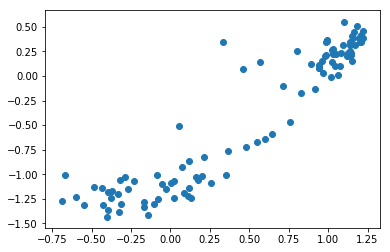

In [18]:
plt.scatter(A2[:,0],A2[:,1]);